## 1. 분석 스토리

김 대표의 양계장에는 7개의 부화장이 있고, 부화장마다 최대 30개의 알을 부화시킬 수 있습니다. 사전에 공부한 바에 따르면 병아리가 부화하는 데 걸리는 기간은 약 21일입니다. 어제까지 딱 21일이 지났습니다. 드디어 김 대표 양계장에 처음으로 생명이 탄생했는데 총 몇 마리의 병아리가 부화했는지 알아보도록 하겠습니다.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt 
import platform
from matplotlib import font_manager, rc
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
import seaborn as sns 

In [4]:
hat = pd.read_csv("./rawdata/ch4-1.csv")

In [5]:
hat.head()

,hatchery,chick
0,A,30
1,B,30
2,C,29
3,D,26
4,E,24


In [6]:
hat.tail(3)

,hatchery,chick
4,E,24
5,F,28
6,G,27


In [8]:
hat['chick'].sum()

194

In [12]:
# 준비된 달걀 : 각 30개, 부화갯수에 따라 부화율이라는 파생변수 만들 수 있음 
hat['chick_rate'] = round(hat['chick'] / 30 * 100, 2)

In [13]:
hat

,hatchery,chick,chick_rate
0,A,30,100.00
1,B,30,100.00
2,C,29,96.67
3,D,26,86.67
4,E,24,80.00
5,F,28,93.33
6,G,27,90.00


In [14]:
hat['chick'].mean()

27.714285714285715

In [15]:
hat['chick'].std()

2.2146697055682827

In [16]:
hat['chick'].min()

24

In [17]:
hat['chick'].median()

28.0

In [18]:
hat.sort_values(by=['chick'])

,hatchery,chick,chick_rate
4,E,24,80.00
3,D,26,86.67
6,G,27,90.00
5,F,28,93.33
2,C,29,96.67
0,A,30,100.00
1,B,30,100.00


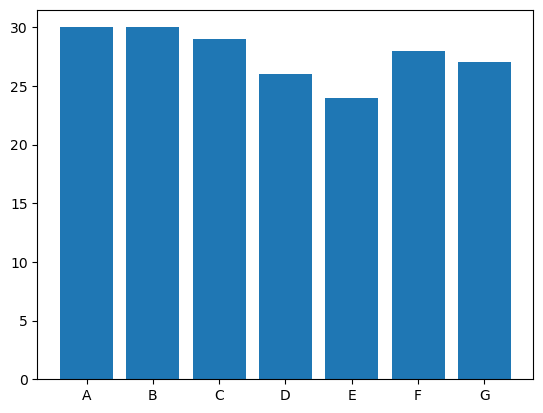

In [21]:
plt.bar(hat['hatchery'], hat['chick'])
plt.show()

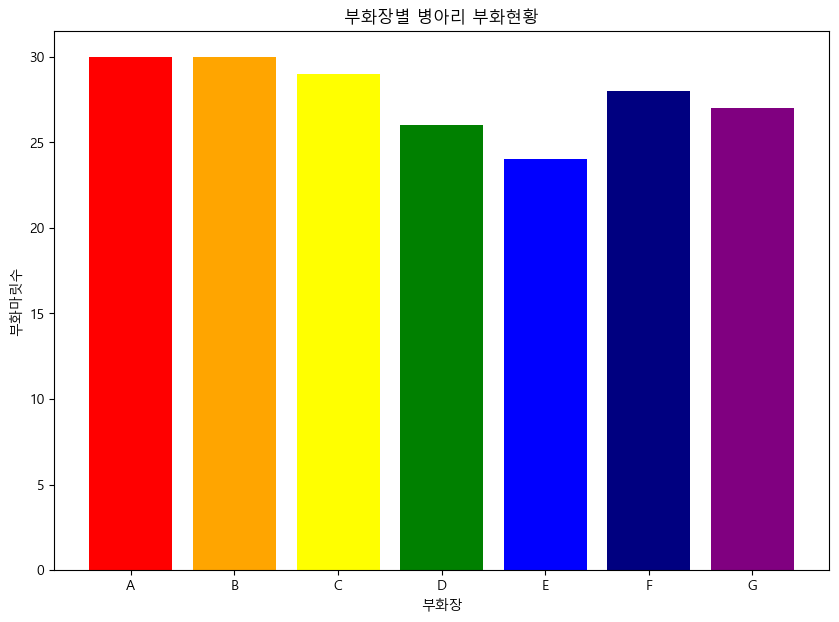

In [24]:
plt.figure(figsize=(10, 7))
plt.bar(hat['hatchery'], hat['chick'], color=('red', 'orange', 'yellow', 'green', 'blue', 'navy', 'purple'))
plt.title('부화장별 병아리 부화현황')
plt.xlabel('부화장')
plt.ylabel('부화마릿수')
plt.show()

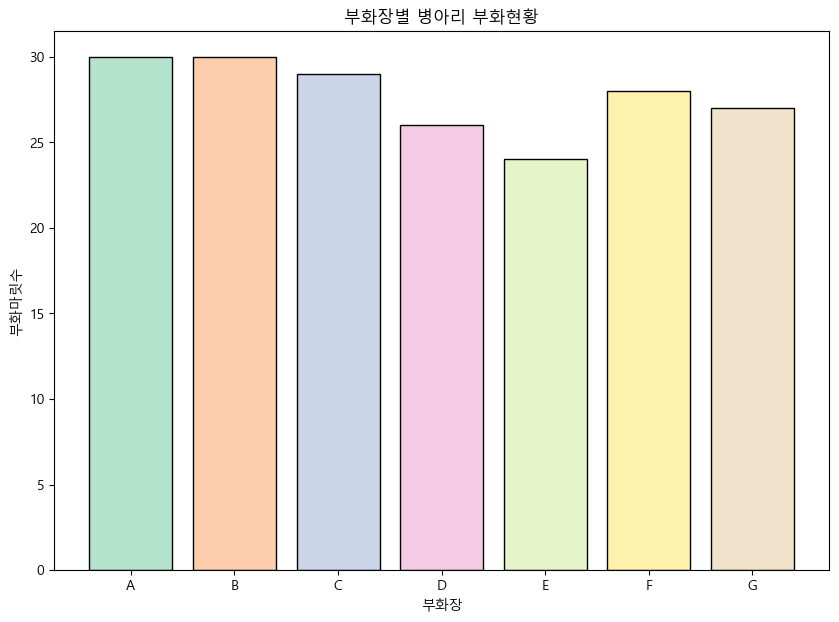

In [27]:
col7 = sns.color_palette('Pastel2', 7)
plt.figure(figsize=(10, 7))
plt.bar(hat['hatchery'], hat['chick'], color=col7, edgecolor='black')
plt.title("부화장별 병아리 부화현황")
plt.xlabel('부화장')
plt.ylabel("부화마릿수")
plt.show()

In [28]:
def addText(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.5, y[i], ha='center')

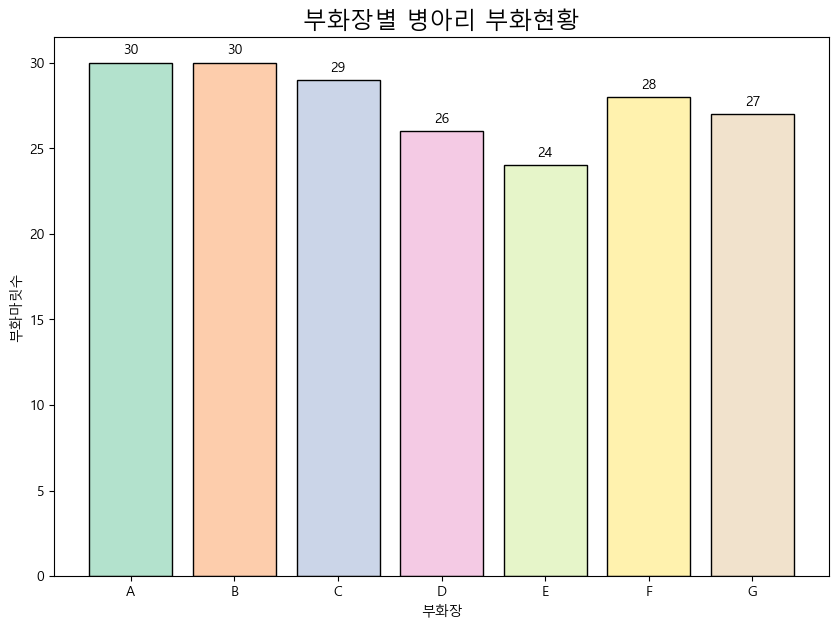

In [29]:
col7 = sns.color_palette('Pastel2', 7)
plt.figure(figsize=(10, 7))
plt.bar(hat['hatchery'], hat['chick'], color=col7, edgecolor='black')
addText(hat['hatchery'], hat['chick'])
plt.title('부화장별 병아리 부화현황', fontsize=17)
plt.xlabel("부화장")
plt.ylabel("부화마릿수")
plt.show()

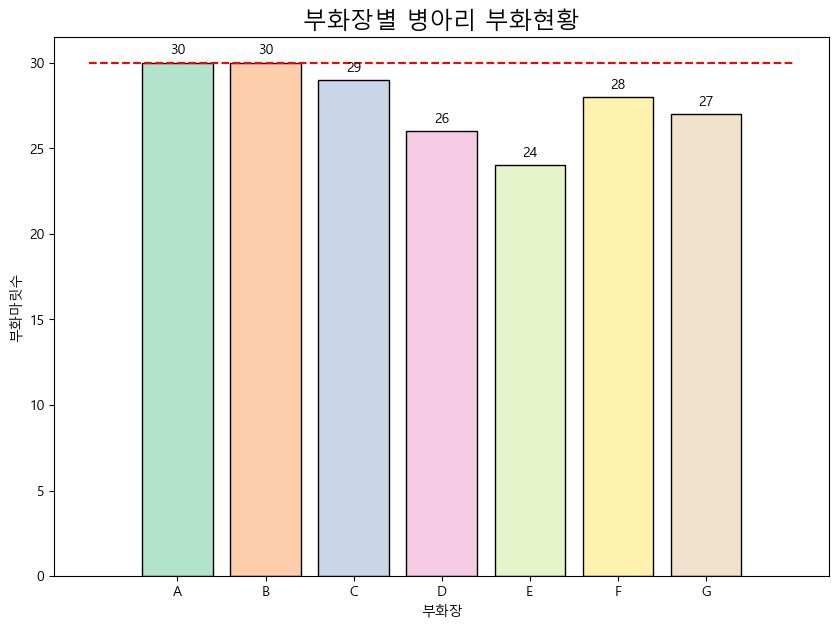

In [30]:
col7 = sns.color_palette('Pastel2', 7)
plt.figure(figsize=(10, 7))
plt.bar(hat['hatchery'], hat['chick'], color=col7, edgecolor='black')
addText(hat['hatchery'], hat['chick'])
plt.hlines(30, -1, 7, colors='red', linestyles='dashed')
plt.title('부화장별 병아리 부화현황', fontsize=17)
plt.xlabel("부화장")
plt.ylabel("부화마릿수")
plt.show()

In [31]:
pct = hat['chick'] / hat['chick'].sum()
pct

0    0.154639
1    0.154639
2    0.149485
3    0.134021
4    0.123711
5    0.144330
6    0.139175
Name: chick, dtype: float64

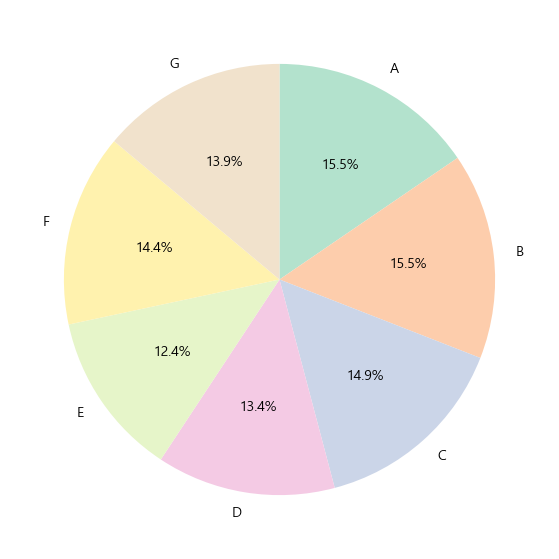

In [33]:
col7 = sns.color_palette('Pastel2', 7)
plt.figure(figsize=(10, 7))
plt.pie(pct, labels=hat['hatchery'], autopct='%.1f%%', colors=col7, startangle=90, counterclock=False)
plt.show()

## 2. 분석 스토리

체계적인 사육을 위해 김 대표는 부화된 병아리 모두에 GPS 위치 추적기가 탑재된 Tag를 부착해 병아리 개별 데이터를 수집하기로 했습니다. 그리고 병아리들의 몸무게를 측정해봤는데 병아리의 몸무게는 얼마일까요?

In [35]:
b = pd.read_csv('./rawdata/ch4-2.csv')
b.head()

,chick_nm,weight
0,b01,37
1,b02,39
2,b03,41
3,b04,45
4,b05,37


In [36]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   chick_nm  30 non-null     object
 1   weight    30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [37]:
b.describe()

,weight
count,30.000000
mean,38.400000
std,3.286335
min,31.000000
25%,36.250000
50%,39.000000
75%,40.750000
max,45.000000


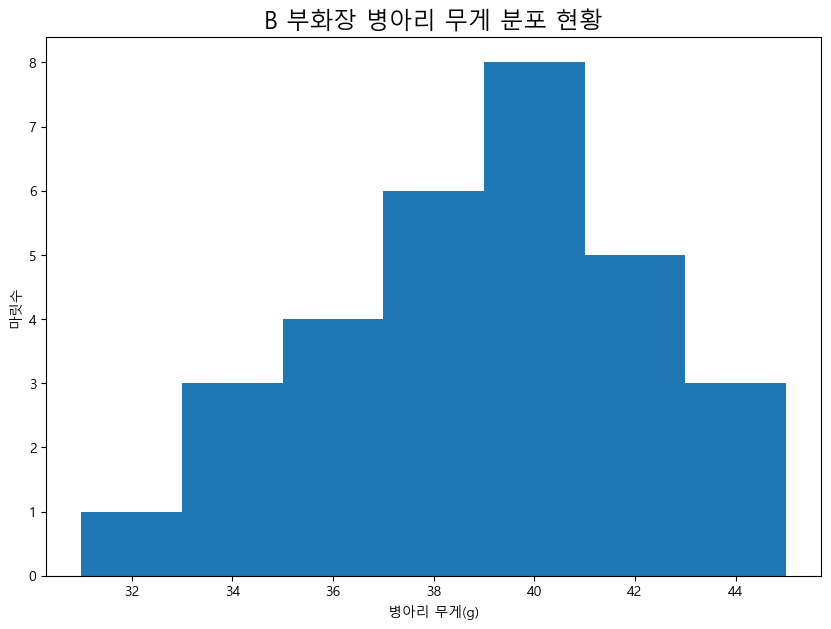

In [38]:
plt.figure(figsize=(10, 7))
plt.hist(b.weight, bins=7)
plt.title("B 부화장 병아리 무게 분포 현황", fontsize=17)
plt.xlabel("병아리 무게(g)")
plt.ylabel("마릿수")
plt.show()

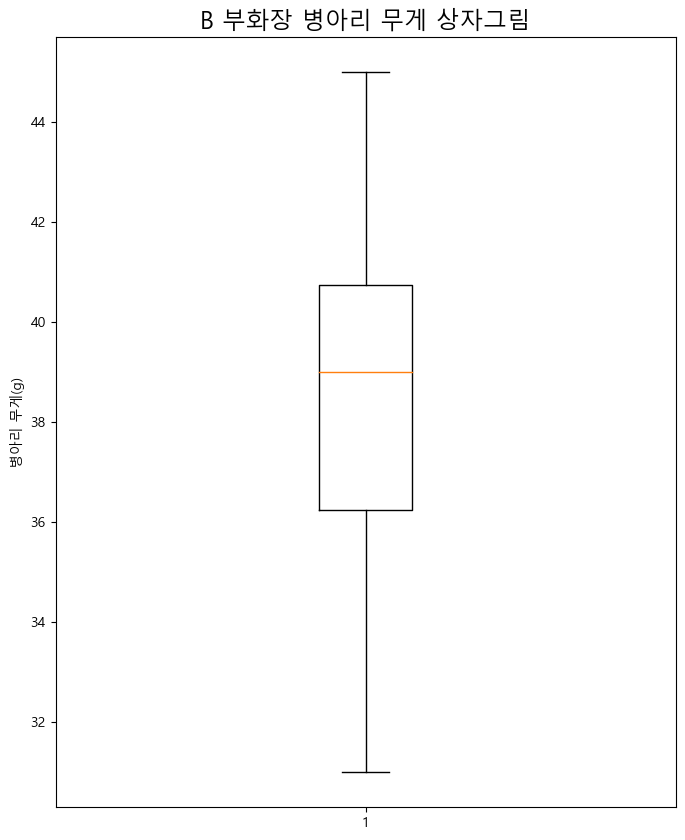

In [39]:
plt.figure(figsize=(8, 10))
plt.boxplot(b.weight)
plt.title("B 부화장 병아리 무게 상자그림", fontsize=17)
plt.ylabel("병아리 무게(g)")
plt.show()

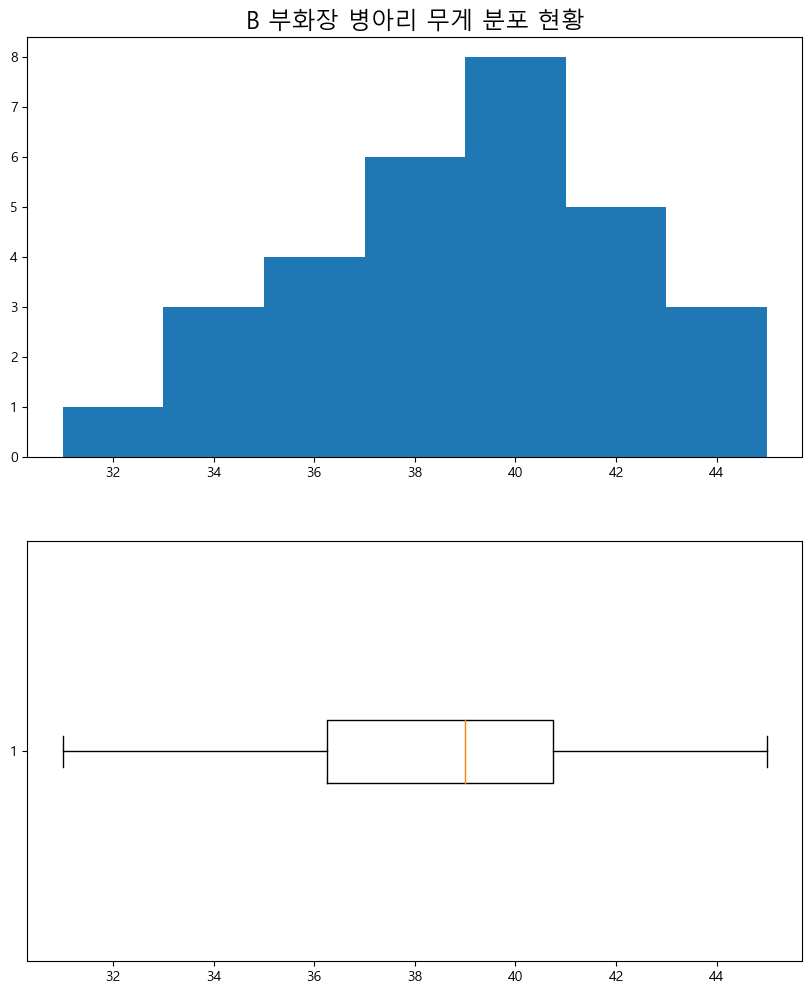

In [40]:
plt.figure(figsize=(10, 12))
plt.subplot(2, 1, 1)
plt.hist(b.weight, bins=7)
plt.title("B 부화장 병아리 무게 분포 현황", fontsize=17)
plt.subplot(2, 1, 2)
plt.boxplot(b.weight, vert=False)
plt.show()

## 3. 분석 스토리

병아리가 부화한지 5일이 지났습니다. 그런데 이상한 점을 발견했습니다. 부화장 A에서 태어난 병아리 대비 부화장 B에서 태어난 병아리의 덩치가 더 작아 보입니다. 서로 다른 사료를 먹이고 있긴 한데 기분 탓인지, 아니면 정말 작은지 한 번 검정해 보겠습니다.

In [41]:
test = pd.read_csv("./rawdata/ch4-3.csv")

In [42]:
test

,hatchery,chick_nm,weight
0,A,a01,112
1,A,a05,116
2,A,a09,106
3,A,a12,104
4,A,a15,116
5,A,a17,118
6,A,a26,110
7,A,a28,112
8,A,a29,106
9,A,a30,108


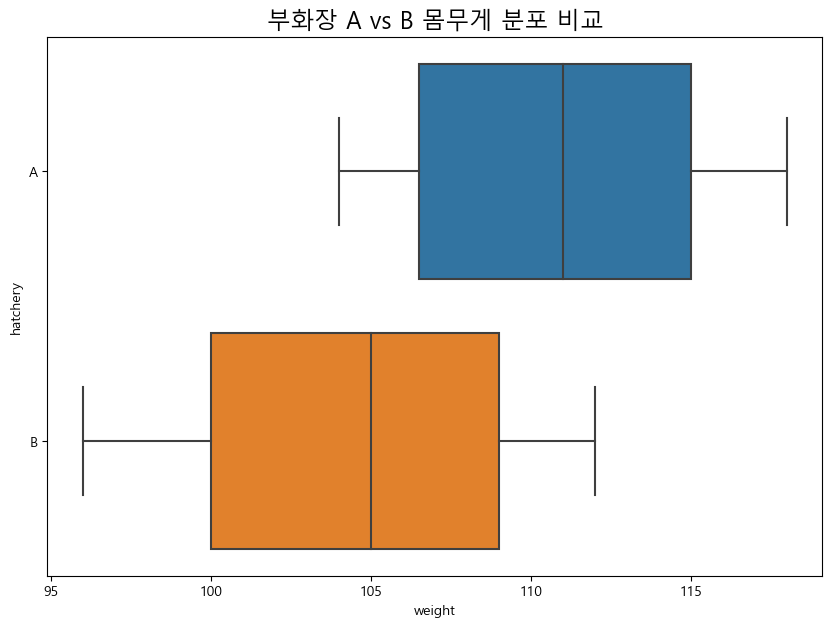

In [43]:
import seaborn as sns 
plt.figure(figsize=(10, 7))
sns.boxplot(x='weight', y='hatchery', data=test)
plt.title("부화장 A vs B 몸무게 분포 비교", fontsize=17)
plt.show()

In [44]:
import scipy as sp 

In [45]:
test_a = test.loc[test.hatchery == 'A', 'weight']
test_b = test.loc[test.hatchery == 'B', 'weight']

In [46]:
# 샤피로 귀무가설 : 정규분포한다 
sp.stats.shapiro(test_a)

ShapiroResult(statistic=0.9400018453598022, pvalue=0.5530338883399963)

In [47]:
sp.stats.shapiro(test_b)

ShapiroResult(statistic=0.9390683770179749, pvalue=0.5426943302154541)

In [49]:
sp.stats.ttest_ind(test_a, test_b)

Ttest_indResult(statistic=2.842528280230058, pvalue=0.010803990633924202)

#### 분석스토리

부화장 B의 병아리들이 부화장 A의 병아리들보다 덩치가 작았던 것은 기분 탓이 아니었습니다. 납품 기한 문제로 인해 불가피하게 수급한 B사의 사료 품질이 A사 대비 떨어졌기 때문입니다. 김 대표는 B사와 거래를 끊고, 며칠 간 발품을 팔아 새로운 사료 제조사인 C사와 거래를 하게 되었고, 다행히 A사와 동일한 품질의 사료임을 t-test를 통해 판정할 수 있었습니다. 그 후 김 대표는 사료 수급처를 다벼노하하면서 안정적인 사료 공급망을 구축해 위기를 모면하게 되었습니다. 